## Continuación Regresión Lineal (aplicaciones)

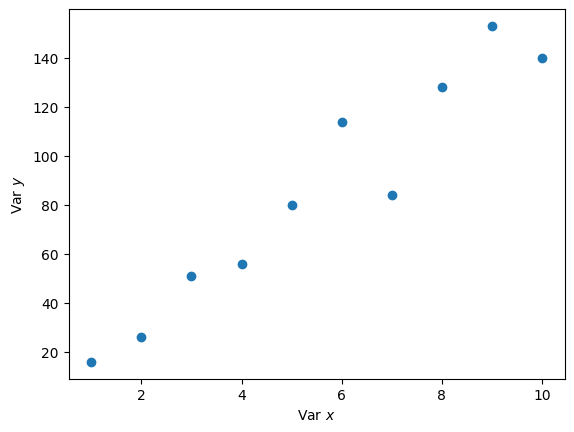

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42) #Fijamos la semilla aleatoria

x = np.arange(1,11) # Generamos 10 numeros desde el 1 al 10
# Generamos 10 numeros aleatorios entre 10 y 20,
# luego lo multiplicamos con nuestra variable x
y = np.random.randint(10, 20, size=10) * x

plt.scatter(x,y) # Grafiquemos como se ven nuestros datos.
plt.xlabel("Var $x$")
plt.ylabel("Var $y$")
plt.show()

## <font color='green'>**Actividad 1**</font>

$$ \beta_1 = \frac{\sum (x - \bar{x})(y - \bar{y})}{\sum (x - \bar{x})^2} $$

-$$ \hat{\beta_0} = \frac{\sum y - \hat{\beta_1}\sum x}{n}$$

In [2]:
x_min_mx = x - np.mean(x)  # x minus mean(x)
y_min_my = y - np.mean(y)  # y minus mean(y)

beta_1 = np.sum(x_min_mx * y_min_my)  / np.sum(x_min_mx**2)
beta_0 = np.mean(y) - (beta_1 * np.mean(x))

print(f'beta_1: {beta_1:5.2f} \nbeta_0: {beta_0:5.2f}')

beta_1: 15.20 
beta_0:  1.20


Con los parámetros $\hat{\beta_1}$ y $\hat{\beta_0}$, podemos generar una función la cual reciba el valor el vector $x$, y realizar la estimación de $\hat{Y}$:

In [3]:
# Llamaremos a esta función, lin_reg(x), recibe el vector y utiliza las variables betas calculadas anteriormente
# Una posible mejora, es que reciba los betas por parámetros de la función
def lin_reg(x):
    y_hat = (beta_1 * x) + beta_0 #Aplicamos la forma de la regresión lineal
    return y_hat

Con esta función definida, podemos graficar nuestra recta obtenida utilizando la función `lin_reg`

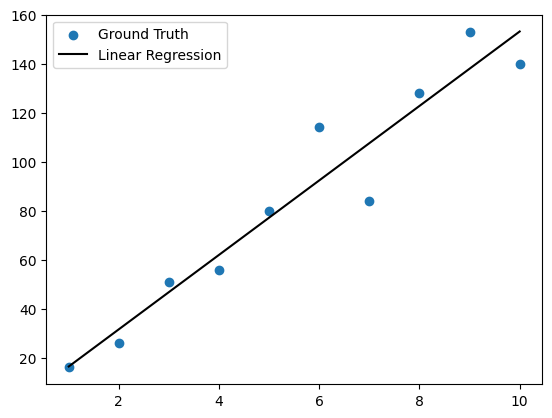

In [4]:
plt.scatter(x,y,label="Ground Truth") # Vamos a gráficar nuestros datos originales
plt.plot(x,lin_reg(x), color="black", label="Linear Regression") #Luego graficamos la curva ajustada

plt.legend()
plt.show()

Podemos ver que nuestra regresión es bastante cercana a los valores reales utilizados para ajustar la regresión. Nosotros podemos calcular la bondad de ajuste de nuestra regresión, mediante el análisis de los errores. El error se define como: $y_i - \hat{y_i}$ y corresponde a la resta del valor real $i$-ésimo, con el valor ajustado $i$-ésimo.

Utilizando Numpy, este cálculo es relativamente sencillo, para mostrar el paso a paso, vamos a tener los valores del vector $y$:


In [5]:
print(y)

[ 16  26  51  56  80 114  84 128 153 140]


Por otra parte, vamos a tener los valores del vector $\hat{y}$:

In [6]:
print(lin_reg(x))

[ 16.4  31.6  46.8  62.   77.2  92.4 107.6 122.8 138.  153.2]


Luego, los errores $e$, se obtienen simplemente con la resta entre estos dos elementos

In [7]:
e = y - lin_reg(x)
print(e)

[ -0.4  -5.6   4.2  -6.    2.8  21.6 -23.6   5.2  15.  -13.2]


Estos errores, podemos graficarlos utilizando el método de matplotlib `vlines` (Vertical Lines). Este método recibe como mínimo 3 parámetros: `x` (los valores en el eje X), `y_min` el inicio de la línea vertical, `y_max` el final de la línea vertical. En este caso, `y_min` va a corresponder a los valores reales $y$, e `y_max` corresponderán a los valores ajustados $\hat{y}$.

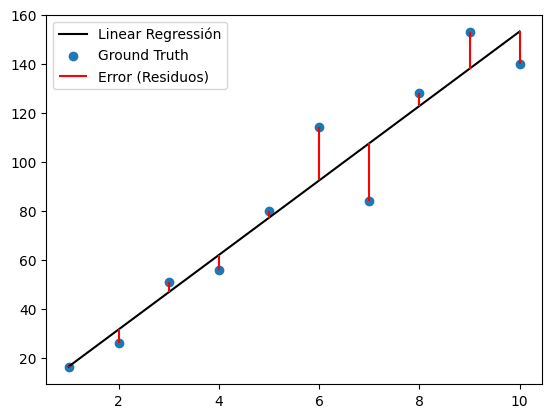

In [8]:
fig, ax = plt.subplots(1,1)
ax.plot(x,lin_reg(x), color="black", label="Linear Regressión")
ax.scatter(x,y, label="Ground Truth")

ax.vlines(x, y, lin_reg(x), color="red", label="Error (Residuos)") #Gráficamos los Errores en cada punto.

plt.legend()
plt.show()

Como anteriormente lo dijimos, la regresión se ajusta bastante bien a los datos simulados. Por lo mismo, ahora vamos a cuantificar qué tan bien se ajusta la regresión. Para esto, vamos a calcular el $R^2$, en función de la __Suma Total de los Cuadrados__, $SST$) y la __Suma de los Errores Cuadrados__, ($SSE$).

El $SST$ obtiene su nombre de su sigla en inglés **Sum of Squares Total**, y esta mide la variabilidad total dentro del set de datos (específicamente dentro de nuestra variable dependiente). Esta se calcula como:

$$ SST = \sum_i (y_i - \bar{y})^2$$

Por otra parte, el $SSE$ obtiene su nombre de su sigla en inglés **Sum of Squares Error**, y mide la diferencia total entre los valores reales (u observados) y los valores ajustados (o predichos). Esta se cacula como:

$$ SSE = \sum_i (y_i - \hat{y})^2 = \sum_i e_i^2$$

Con estas dos métricas podemos calcular el __coeficiente de determinación__, $R^2$. Esto nos proporcionara una métrica que podemos utilizar para cuantificar cuanta variabilidad explican nuestro modelo de regresión. Esta se calcula de la siguiente forma utilizando las dos métricas mencionadas anteriormente.

$$ R^2 = 1 - \frac{SSE}{SST}$$

El $R^2$ puede resultar en valores entre $[0,1]$, donde si $R^2 = 1$, significa que la variable utilizada para la regresión lineal simple explica el 100% del comportamiento de la variable dependiente. Por el contrario, un $R^2 = 0$ significa que la variable independiente utilizada, no es capaz de explicar el comportamiento de la variable dependiente.

Calculemos el $R^2$ para nuestros datos sintéticos:


## Extra Entendiendo SSE y SST

# Demostración: La suma de los residuos es cero en regresión lineal

En un modelo de regresión lineal, los residuos $e_i$ se definen como la diferencia entre los valores observados $Y_i$ y los valores predichos $\hat{Y}_i$:

$$ e_i = Y_i - \hat{Y}_i $$

## Propiedad clave: Suma de los residuos

La suma de los residuos en una regresión lineal ordinaria es igual a cero. Esta propiedad se puede demostrar mediante los siguientes pasos:

### 1. Definición del modelo de regresión lineal

En un modelo de regresión lineal simple, la predicción para el i-ésimo valor se calcula como:

$$ \hat{Y}_i = \beta_0 + \beta_1 X_i $$

Donde:
- $\beta_0$ es el intercepto.
- $\beta_1$ es el coeficiente de la variable independiente $X_i$.

### 2. Función objetivo: Minimización de la suma de los cuadrados de los residuos

El objetivo de la regresión lineal ordinaria es encontrar los valores de $\beta_0$ y $\beta_1$ que minimicen la suma de los cuadrados de los residuos $\sum_{i=1}^{n} e_i^2$.

### 3. Derivada parcial respecto a $\beta_0$

Para minimizar la suma de los cuadrados de los residuos, tomamos la derivada parcial de la función objetivo respecto a $\beta_0$ y la igualamos a cero:

$$ \sum_{i=1}^{n} e_i = \sum_{i=1}^{n} (Y_i - \hat{Y}_i) = \sum_{i=1}^{n} (Y_i - (\beta_0 + \beta_1 X_i)) = 0 $$

### 4. Simplificación

Al tomar la suma de los residuos, observamos que la suma de las predicciones $\hat{Y}_i$ centradas en la media es igual a la suma de los valores observados $Y_i$ centrados en la media, lo que se simplifica a:

$$ \sum_{i=1}^{n} Y_i - \sum_{i=1}^{n} \beta_0 - \sum_{i=1}^{n} \beta_1 X_i = 0 $$

Separando los términos:

$$ \sum_{i=1}^{n} Y_i - n \beta_0 - \beta_1 \sum_{i=1}^{n} X_i = 0 $$

Como $\beta_0$ y $\beta_1$ son constantes, podemos sacar la suma de las constantes fuera de la sumatoria:

$$ \sum_{i=1}^{n} Y_i - n \beta_0 - \beta_1 \sum_{i=1}^{n} X_i = 0 $$

### 5. Propiedad de la media

Recordemos que el valor predicho promedio es igual al valor observado promedio, por lo tanto, cuando sumamos las diferencias, la suma de las predicciones promedio será igual a la suma de los valores observados promedio, que se cancela:

$$ n \bar{Y} - n \bar{Y} = 0 $$

Esto implica que:

$$ \sum_{i=1}^{n} e_i = 0 $$

In [9]:
print(e, sum(e))

[ -0.4  -5.6   4.2  -6.    2.8  21.6 -23.6   5.2  15.  -13.2] 2.4868995751603507e-14


## Conclusión

Hemos demostrado que la suma de los residuos en una regresión lineal ordinaria es igual a cero. Esta propiedad se debe a cómo se construye el modelo para minimizar la suma de los cuadrados de los residuos. En otras palabras, el modelo de regresión se ajusta de manera que los errores positivos y negativos se compensan entre sí, resultando en una suma total de residuos igual a cero.

In [10]:
SST = np.sum((y - np.mean(y))**2) #Calculamos la suma total de los cuadrados
SSE = np.sum((y - lin_reg(x))**2) # Calculamos la suma de los errores cuadrados
R2 = 1 - (SSE / SST) # Computamos el R^2

print(f"El R^2 obtenido para nuestros datos sintéticos es de {R2:6.4f}")

El R^2 obtenido para nuestros datos sintéticos es de 0.9251


Con esto, podemos decir que nuestra regresión lineal simple, es capaz de explicar un $92.51\%$ de la variabilidad del comportamiento de nuestra variable dependiente sintética. Esto hace bastante sentido, ya que ese $7.49\%$ que no es capaz de explicar, principalmente se debe a la aleatoriedad que nosotros introdujimos en la variable dependiente (`np.random.randint(10, 20, size=10)`).

Otras métricas existentes para poder ver que tan buena es nuestra regresión, consisten en el análisis de los errores. Si nuestra regresión fuese perfecta, podríamos ver que el  $SSE = 0$, indicando claramente que nuestros valores predichos, son iguales a los valores observados.

Estas métricas incluyen el __Error Cuadrático Medio__ (__Mean Squared error__, $MSE$), El __Error Absoluto Medio__ (__Mean Absolute Error__, $MAE$) y el __Error Absoluto Porcentual Promedio__ (__Mean Absolute Percentage Error__, $MAPE$). Idealmente, si utilizamos nuestra regresión para poder hacer pronósticos, nosotros queremos que los errores que podamos cometer sean mínimos (de lo contrario, sería una mala predicción). Estas métricas nos permiten evaluar el error de nuestros modelos, y por consiguiente decir si nuestra regresión podría utilizarse para realizar pronósticos.

Interpretaciónes que se les pueden dar a estas métricas son bastante directas: el $MAE$ nos dirá una magnitud promedio de los residuos, dando una vista general de como podría comportarse nuestra regresión. El $MAPE$ nos indicara porcentualmente, que tanto se aleja nuestros valores predichos, de los valores reales. Finalmente, el $MSE$ cumple una misma función que el $MAE$, pero como estamos usando el cuadrado de los errores, esta métrica nos indicara que tan bueno es nuestro modelo, con respecto a valores atípicos (el error va a aumentar considerablemente para puntos alejados de nuestra regresión). Esto lo podrían visualizar en el gráfico de los errores visto anteriormente.

Las fórmulas para cada una de estas métricas son:

$$ MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y})^2$$

$$ MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}|$$

$$ MAPE = \frac{1}{n} \sum_{i=1}^n |\frac{y_i - \hat{y}}{y_i}|$$


Utilizando `numpy` podemos computarlas:


In [11]:
mse = np.sum((y - lin_reg(x))**2) / len(y)
mae = np.sum(np.abs(y - lin_reg(x))) / len(y)
mape = np.sum(np.abs((y - lin_reg(x))/y)) / len(y)

Luego, simplemente las imprimimos y vemos que si bien, el $MAE$ y el $MAPE$ son bajos, los puntos {6, 7, 9, 10} de los datos, influyen considerablemente en el $MSE$

In [12]:
print(f'MSE = {mse:6.2f}\nMAE = {mae:6.2f}\nMAPE = {mape:5.2f}')

MSE = 154.28
MAE =   9.76
MAPE =  0.12


Alternativamente, podemos utilizar la librería de `scikit-learn` para poder usar sus implementaciones del $MSE$, $MAE$ y el $R^2$ (el $MAPE$ no está implementado en esta librería). Cada uno de estos métodos, recibe dos parámetros: los valores observados/reales `y_real` y los valores predichos/ajustados `y_pred`.

Luego el uso de estas funciones son tan simples como por ejemplo:
```python
mean_squared_error(y_real , y_pred)
```

In [13]:
# importamos las librerias
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [14]:
# calculamos cada una de estas métricas, y podemos ver que los valores
# son iguales a nuestras implementaciones en Numpy puro.
mse = mean_squared_error(y , lin_reg(x))
mae = mean_absolute_error(y , lin_reg(x))
r2= r2_score(y , lin_reg(x))

print(f'MSE      = {mse:6.2f}\nMAE      = {mae:6.2f}\nR2 Score = {r2:6.2f}')

MSE      = 154.28
MAE      =   9.76
R2 Score =   0.93


### <font color='green'>**Aplicación**:</font>
#### Predicción del consumo de cerveza


Este set de datos fue recolectado en São Paulo - Brasil. Específicamente en un área universitaria con grupos de estudiantes entre 18 a 28 años de edad. Existen 7 variables en este set de datos:

- __Data__: la fecha en que se tomó la medición
- __Temperatura Media ($^oC$)__: la temperatura promedio durante todo un día
- __Temperatura Mínima ($^oC$)__: la temperatura mínima durante todo un día
- __Temperatura Máxima ($^oC$)__: la temperatura máxima durante todo un día
- __Precipitacao (mm)__: cantidad de mm de precipitaciones (lluvia):
- __Final de Semana__: Si era fin de semana (o no).
- __Consumo de cerveja (litros)__: La cantidad de cervezas consumidas en promedio de los grupos.

Esta última variable, corresponde a nuestra variable dependiente. La dinámica consiste en encontrar la variable independiente que explique mejor el consumo de cerveza. Ante esto, deberán ajustar $5$ modelos de regresión lineal simple y obtener las métricas de bondad de ajuste y de errores para cada uno de estos modelos. Indique cuál fue esta variable e imprima por pantalla cuales fueron los valores de $R^2$ y $MAE$, $MAPE$ y $MSE$. Finalmente, haga el gráfico de la regresión lineal mostrando los errores obtenidos por la variable más explicativa.


In [14]:
# Su codigo aca ...
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
cerveza_df = pd.read_csv("Consumo_cerveja.csv")

# Renombrar columnas para facilitar el acceso
cerveza_df.columns = ['Data', 'Temperatura_Media', 'Temperatura_Minima', 'Temperatura_Maxima',
                      'Precipitacao', 'Final_de_Semana', 'Consumo_de_cerveja']

# Convertir la columna 'Data' a tipo fecha si no está en ese formato
cerveza_df['Data'] = pd.to_datetime(cerveza_df['Data'])

# Mostrar las primeras filas para entender la estructura de los datos
cerveza_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data                365 non-null    datetime64[ns]
 1   Temperatura_Media   365 non-null    float64       
 2   Temperatura_Minima  365 non-null    float64       
 3   Temperatura_Maxima  365 non-null    float64       
 4   Precipitacao        365 non-null    float64       
 5   Final_de_Semana     365 non-null    int64         
 6   Consumo_de_cerveja  365 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 20.1 KB


In [15]:
cerveza_df["Data"]

0     2015-01-01
1     2015-01-02
2     2015-01-03
3     2015-01-04
4     2015-01-05
         ...    
360   2015-12-27
361   2015-12-28
362   2015-12-29
363   2015-12-30
364   2015-12-31
Name: Data, Length: 365, dtype: datetime64[ns]

Variable independiente: Temperatura_Media
R^2: 0.3301820493324322
MAE: 2.9552853855692707
MSE: 12.92710873443203
MAPE: 11.866143015777052
---------------------------------------


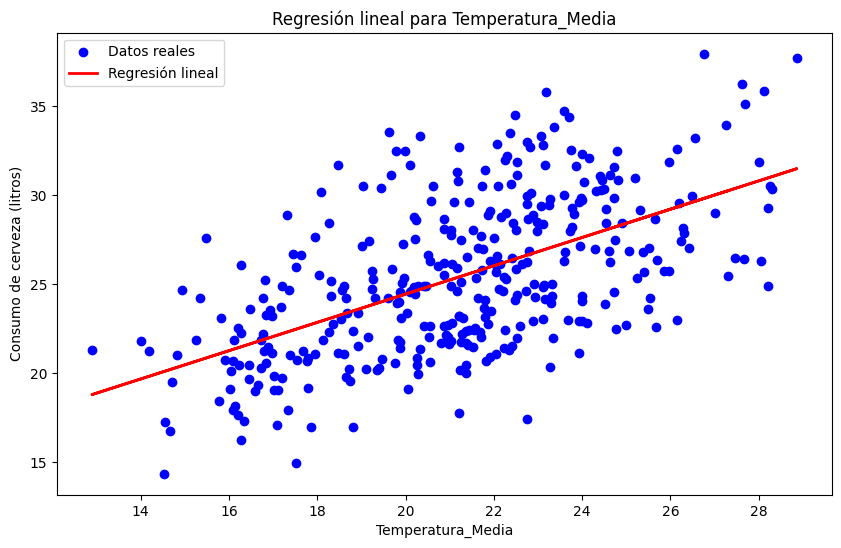

Variable independiente: Temperatura_Minima
R^2: 0.1540631083123537
MAE: 3.3102579821783378
MSE: 16.32610498183107
MAPE: 13.40557309159251
---------------------------------------


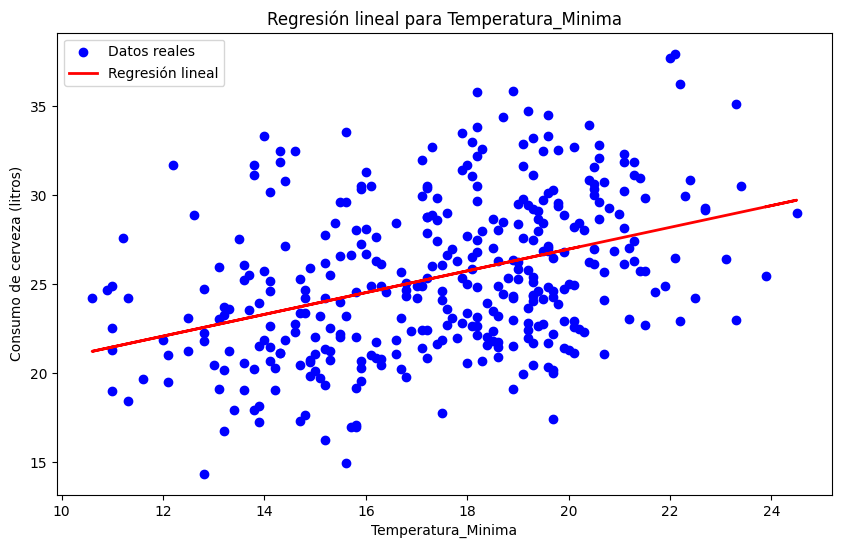

Variable independiente: Temperatura_Maxima
R^2: 0.413027909953363
MAE: 2.7642672738837044
MSE: 11.328230341613486
MAPE: 11.041857942609
---------------------------------------


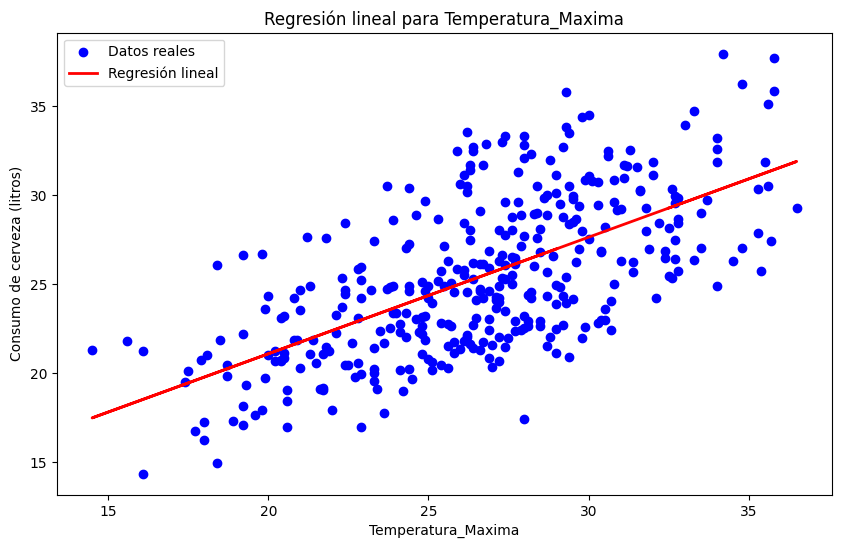

Variable independiente: Precipitacao
R^2: 0.037552356536804665
MAE: 3.5547627599855987
MSE: 18.574696790145335
MAPE: 14.489671916675764
---------------------------------------


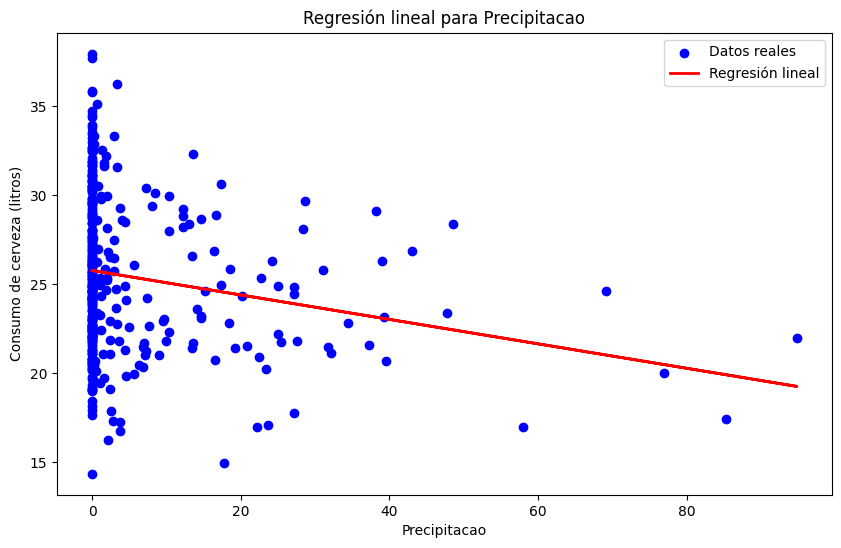

Variable independiente: Final_de_Semana
R^2: 0.2560162860930929
MAE: 3.0706100632244464
MSE: 14.358466142533073
MAPE: 12.543897884140677
---------------------------------------


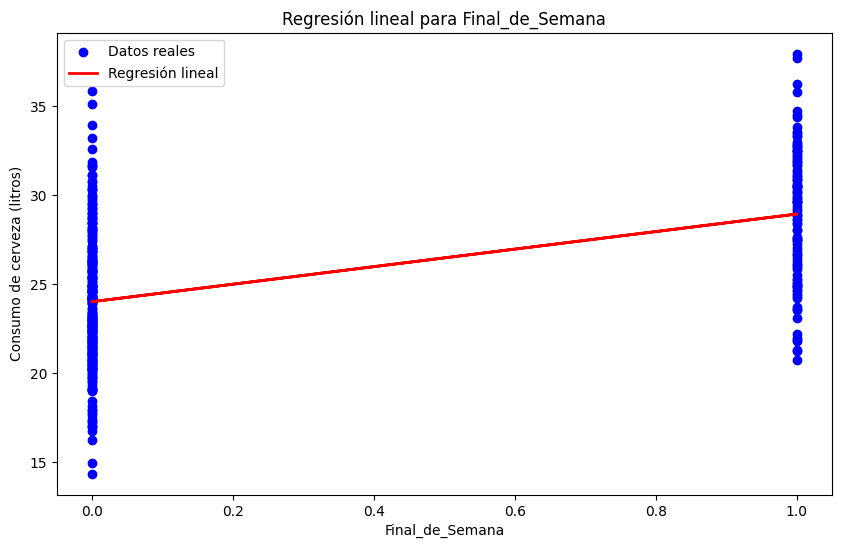

Métricas de todos los modelos:
{'Variable_Independiente': 'Temperatura_Media', 'R^2': 0.3301820493324322, 'MAE': 2.9552853855692707, 'MSE': 12.92710873443203, 'MAPE': np.float64(11.866143015777052)}
{'Variable_Independiente': 'Temperatura_Minima', 'R^2': 0.1540631083123537, 'MAE': 3.3102579821783378, 'MSE': 16.32610498183107, 'MAPE': np.float64(13.40557309159251)}
{'Variable_Independiente': 'Temperatura_Maxima', 'R^2': 0.413027909953363, 'MAE': 2.7642672738837044, 'MSE': 11.328230341613486, 'MAPE': np.float64(11.041857942609)}
{'Variable_Independiente': 'Precipitacao', 'R^2': 0.037552356536804665, 'MAE': 3.5547627599855987, 'MSE': 18.574696790145335, 'MAPE': np.float64(14.489671916675764)}
{'Variable_Independiente': 'Final_de_Semana', 'R^2': 0.2560162860930929, 'MAE': 3.0706100632244464, 'MSE': 14.358466142533073, 'MAPE': np.float64(12.543897884140677)}


In [16]:
# Definir las variables independientes y dependiente
X = cerveza_df[['Temperatura_Media', 'Temperatura_Minima', 'Temperatura_Maxima',
                'Precipitacao', 'Final_de_Semana']]
y = cerveza_df['Consumo_de_cerveja']

# Inicializar lista para almacenar métricas
model_metrics = []

# Función para entrenar y evaluar el modelo
def train_and_evaluate_model(X, y, feature_name):
    # Crear modelo de regresión lineal
    model = LinearRegression()

    # Entrenar el modelo
    model.fit(X, y)

    # Predecir con todos los datos
    y_pred = model.predict(X)

    # Calcular métricas
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    mape = np.mean(np.abs((y - y_pred) / y)) * 100

    # Guardar métricas en una lista
    model_metrics.append({
        'Variable_Independiente': feature_name,
        'R^2': r2,
        'MAE': mae,
        'MSE': mse,
        'MAPE': mape
    })

    # Imprimir métricas
    print(f"Variable independiente: {feature_name}")
    print(f"R^2: {r2}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"MAPE: {mape}")
    print("---------------------------------------")

    # Graficar la regresión lineal
    plt.figure(figsize=(10, 6))
    plt.scatter(X[feature_name], y, color='blue', label='Datos reales')
    plt.plot(X[feature_name], y_pred, color='red', linewidth=2, label='Regresión lineal')
    plt.title(f'Regresión lineal para {feature_name}')
    plt.xlabel(f'{feature_name}')
    plt.ylabel('Consumo de cerveza (litros)')
    plt.legend()
    plt.show()

# Ejecutar para cada variable independiente
for column in X.columns:
    train_and_evaluate_model(X[[column]], y, column)

# Mostrar todas las métricas recopiladas
print("Métricas de todos los modelos:")
for metrics in model_metrics:
    print(metrics)


Proxima clase, regresión lineal con múltiples variables independientes

## <font color='blue'>**Regresión lineal con múltiples variables independientes**</font>


Utilizando el mismo dataset obtenido de la dinámica 2, vamos a ajustar una regresión lineal múltiple. Esto quiere decir, que, en vez de ajustar un solo parámetro en nuestra regresión para tratar de explicar la variable dependiente, utilizaremos dos o más variables dependientes. En este caso, nuestra regresión tomara una nueva forma:


$$Y =  \beta_0 +X_1\beta_1+X_2\beta_2+\dots+X_m\beta_m$$

En este caso vamos a tener $m+1$ parámetros, donde $m$ corresponde a la cantidad de variables dependientes que utilizaremos. La razón de que sean $m+1$ variables, es porque tenemos que considerar el intercepto $\hat{\beta_0}$.

La ecuación anterior, podemos representarlas en forma matricial:

$$ Y = X^T\beta$$

donde:

$$Y = \begin{bmatrix}Y_1 \\ Y_2  \\ \vdots \\ Y_m\end{bmatrix} \quad \beta = \begin{bmatrix}\beta_1 \\ \beta_2  \\ \vdots \\ \beta_m\end{bmatrix}  \quad X = \begin{bmatrix}X_{11} & X_{12} & \cdots & X_{1m}\\ X_{21} & X_{22} & \cdots & X_{2m}  \\ \vdots & \vdots & \ddots & \vdots\\ X_{n1} & X_{n2} & \cdots & X_{nm}\end{bmatrix}$$

El encontrar la matriz de los parámetros estimados $\hat{\beta}$ para generar nuestra predicción $\hat{Y}$ se lleva a cabo minimizando la suma de los errores para cada una de las variables presentes en nuestro set de datos. Esto nos genera una solución fácilmente programable en Numpy, de la forma:

$$\hat{\beta} = (X^TX)^{-1}X^TY $$

Para poder incorporar el intercepto ($\beta_0$), tenemos que hacer una pequeña modificación a la matriz $X$, y esta corresponde a agregar una columna de largo $n$, con la constante $1$. Esto se hace para poder modelar el intercepto en la última ecuación presentada:

$$X = \begin{bmatrix}X_{11} & X_{12} & \cdots & X_{1m}\\ X_{21} & X_{22} & \cdots & X_{2m}  \\ \vdots & \vdots & \ddots & \vdots\\ X_{n1} & X_{n2} & \cdots & X_{nm}\end{bmatrix} \rightarrow X' = \begin{bmatrix} 1& X_{11} & X_{12} & \cdots & X_{1m}\\ 1 & X_{21} & X_{22} & \cdots & X_{2m}  \\ \vdots & \vdots & \vdots & \ddots & \vdots\\ 1 &X_{n1} & X_{n2} & \cdots & X_{nm}\end{bmatrix}$$


In [37]:
import pandas as pd
# Cargamos los datos
cerveza_df = pd.read_csv("Consumo_cerveja.csv")

cerveza_df.head(10) # Mostramos los primeros 5

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900
5,2015-01-06,23.78,20.1,30.5,12.2,0,28.218
6,2015-01-07,24.00,19.5,33.7,0.0,0,29.732
7,2015-01-08,24.90,19.5,32.8,48.6,0,28.397
8,2015-01-09,28.20,21.9,34.0,4.4,0,24.886
9,2015-01-10,26.76,22.1,34.2,0.0,1,37.937


In [38]:
#Extraemos nuestras primeras 5 variables independientes
X1 = cerveza_df['Temperatura Media (C)']
X2 = cerveza_df['Temperatura Minima (C)']
X3 = cerveza_df['Temperatura Maxima (C)']
X4 = cerveza_df['Precipitacao (mm)']
X5 = cerveza_df['Final de Semana']

# Extraemos la variable dependiente
y = cerveza_df['Consumo de cerveja (litros)']


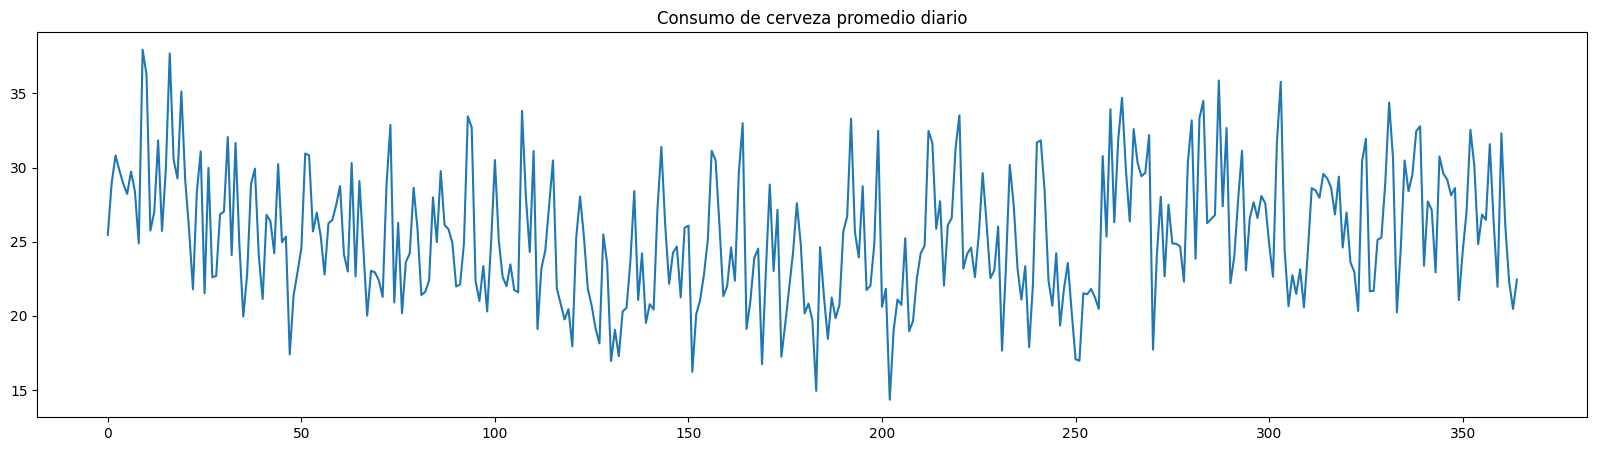

In [39]:
# Vamos a graficar nuestra variable y a traves del tiempo:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,5))
plt.plot(np.arange(len(y)),y)
plt.title("Consumo de cerveza promedio diario")
plt.show()

Acá generaremos una grilla de matplotlib, la cual  nos permitirá generar subgráficos que ocupen más de una fila/columna.

[Documentación Gridspec](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.gridspec.GridSpec.html)

En este caso, vamos a hacer varios diagramas de dispersión, para ver la relación existente entre nuestras variables independientes, con la variable dependiente.


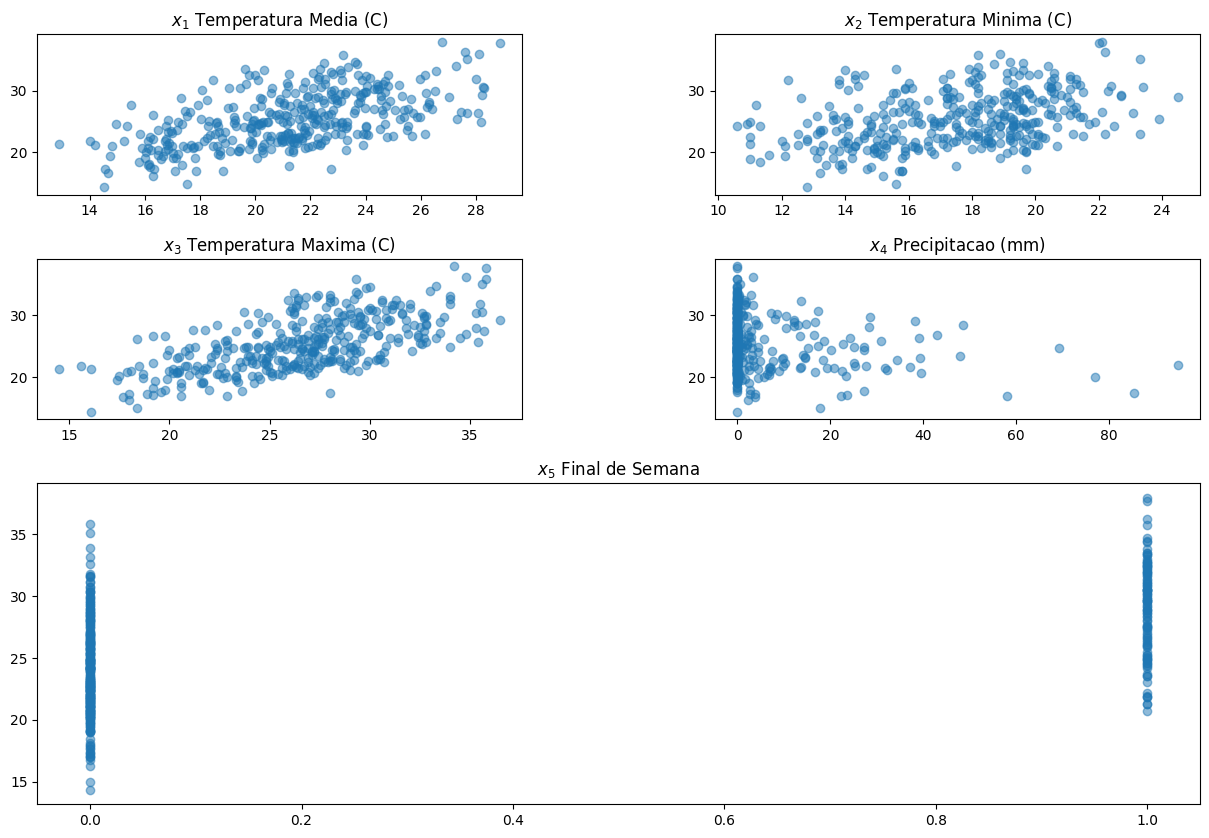

In [40]:
grid = plt.GridSpec(3, 2, wspace=0.4, hspace=0.3, height_ratios=[1, 1, 2])

plt.figure(figsize=(15,10))
ax = plt.subplot(grid[0,0]) #Ocupar la primera fila, primera columna
ax.scatter(X1, y, alpha=0.5)
ax.set_title("$x_1$ Temperatura Media (C)")

ax = plt.subplot(grid[0,1])#Ocupar la primera fila, segunda columna
ax.scatter(X2, y, alpha=0.5)
ax.set_title("$x_2$ Temperatura Minima (C)")

ax = plt.subplot(grid[1,0]) #Ocupar la segunda fila, primera columna
ax.scatter(X3, y, alpha=0.5)
ax.set_title("$x_3$ Temperatura Maxima (C)")

ax = plt.subplot(grid[1,1])#Ocupar la segunda fila, segunda columna
ax.scatter(X4, y, alpha=0.5)
ax.set_title("$x_4$ Precipitacao (mm)")

ax = plt.subplot(grid[2,:])#Ocupar la tercera fila y ambas columnas
ax.scatter(X5, y, alpha=0.5)
ax.set_title("$x_5$ Final de Semana")


plt.show()

Podemos ver que el consumo de cerveza al parecer tiene una correlación positiva con las temperaturas. Generemos nuestra matriz X previo al proceso de obtención de los betas:

In [41]:
X = np.zeros((len(X1),6)) #Generamos una matriz de Nx6, uno para cada una de nuestros variables independientes, e incluyendo la columna para el intercepto:
X.shape

(365, 6)

In [42]:
# Llenamos la matriz, con cada una de los valores correspondientes, en este caso, el intercepto ira en la primera columna
# y para el resto de las columnas las extraeremos utilizando los valores de una serie de pandas (.value)
X[:,0] = 1
X[:,1] = X1.values
X[:,2] = X2.values
X[:,3] = X3.values
X[:,4] = X4.values
X[:,5] = X5.values


In [43]:
X[:5] #Ãhora imprimimos las primeras 5 filas

array([[ 1.  , 27.3 , 23.9 , 32.5 ,  0.  ,  0.  ],
       [ 1.  , 27.02, 24.5 , 33.5 ,  0.  ,  0.  ],
       [ 1.  , 24.82, 22.4 , 29.9 ,  0.  ,  1.  ],
       [ 1.  , 23.98, 21.5 , 28.6 ,  1.2 ,  1.  ],
       [ 1.  , 23.82, 21.  , 28.3 ,  0.  ,  0.  ]])

Para transponer una matriz de Numpy, es tan sencillo como llamar a `matriz.T` para realizar esta operación. En el caso de la multiplicación matricial, necesitamos utilizar el método `np.dot` (Recordar que existen la restricción de que el número de columnas de la primera matriz, tiene que ser igual al número de filas de la segunda matriz). Finalmente, para invertir una matriz, tenemos que utilizar el método `np.lingal.inv` y aplicarlo en una matriz.

$$ \hat{\beta} = (X^TX)^{-1}X^TY $$

In [44]:
XTX = np.dot(X.T,X) # Calculamos X traspuesto multiplicado por X
XTY = np.dot(X.T,y) # Calculamos X traspuesto por Y
betas = np.dot(np.linalg.inv(XTX),XTY) #Calculamos XTX^-1 por XTY, el resultado va a ser nuestro vector de betas de largo m + 1

# Extraemos los betas
beta_0 = betas[0]
beta_1 = betas[1]
beta_2 = betas[2]
beta_3 = betas[3]
beta_4 = betas[4]
beta_5 = betas[5]

betas #Imprimimos los valores de nuestros parametros ajustados

array([ 6.44469636,  0.03079559, -0.01903491,  0.65600076, -0.05746938,
        5.18318073])

In [45]:
#Finalmente, definimos nuestra función  para la regresión lineal, que reciba por parametros los arreglos para cada variable
# y que internamente, calcule la variable Y con los nuevos betas

def lin_reg2(x1, x2, x3, x4, x5):
    y_hat = (beta_1 * x1) + (beta_2 * x2) + (beta_3 * x3) + (beta_4 * x4) + (beta_5 * x5) + beta_0
    return y_hat

Graficamos la señal original, en comparación con lo que obtenemos de nuestra regresión lineal múltiple

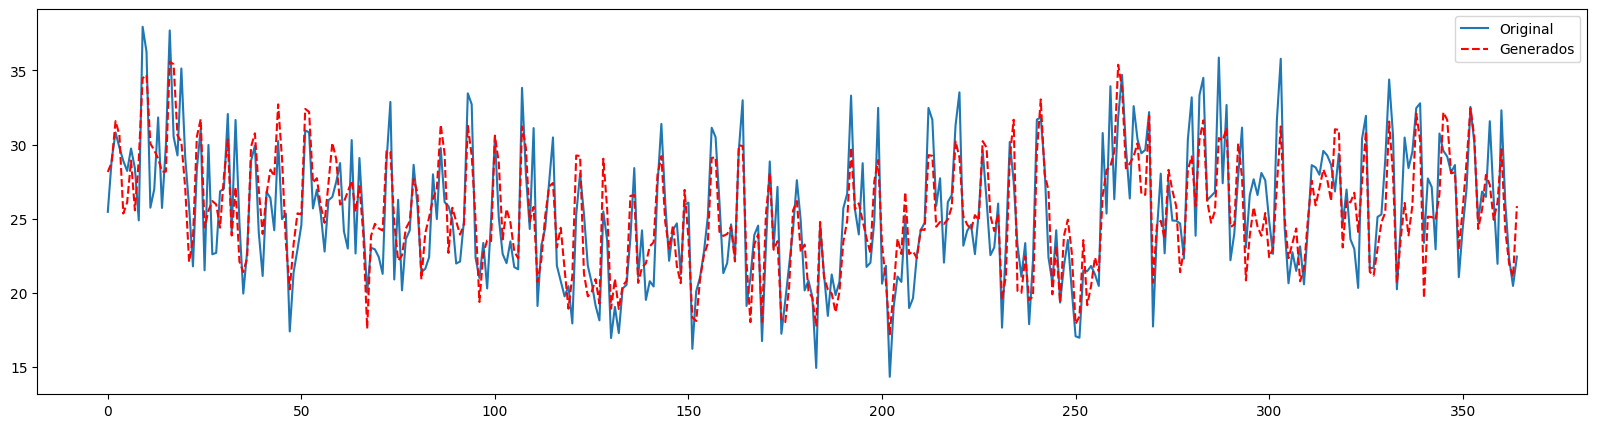

In [26]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(len(y)), y, label="Original")
plt.plot(np.arange(len(y)), lin_reg2(X1, X2, X3, X4, X5),'--', color="red", label="Generados")

plt.legend()

plt.show()

Y a su vez, podemos calcular nuestras métricas de bondad de ajuste, y errores asociados:

In [27]:
SST = np.sum((y - np.mean(y))**2)
SSE = np.sum((y - lin_reg2(X1,X2,X3,X4,X5))**2)

R2 = 1 - (SSE/SST)

print(f'\nR2 Score = {R2:6.2f}')


R2 Score =   0.72


In [28]:
mse = np.sum((y - lin_reg2(X1,X2,X3,X4,X5))**2) / len(y)
mae = np.sum(np.abs(y - lin_reg2(X1,X2,X3,X4,X5))) / len(y)
mape = np.sum(np.abs((y - lin_reg2(X1,X2,X3,X4,X5))/y)) / len(y)

In [29]:
print(f'\nMSE = {mse:6.2f}\nMAE = {mae:6.2f}\nMAPE = {mape:5.2f}')


MSE =   5.35
MAE =   1.96
MAPE =  0.08


de lo obtenido, podemos ver que utilizando una regresión lineal múltiple, nuestro $R^2$ aumenta, y los errores disminuyen al compararse con el mejor de las regresiones simples realizadas en la dinámica 2.

Para ir finalizando, existen múltiples librerías que ya tienen implementado las regresiones lineales, vamos a ver la implementación existente en `scikit-learn`

[Documentación LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)


In [30]:
# En este caso, de scikit-learn, de los modelos lineales, importamos la regresión lineal
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # Y generamos un obtejo de LinearRegressión

In [31]:
# Obtenemos nuestra matriz X
# Eliminamos las columnas 0 y 6 (fecha y consumo)
X = cerveza_df.iloc[:,1:6]
X.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana
0,27.30,23.9,32.5,0.0,0
1,27.02,24.5,33.5,0.0,0
2,24.82,22.4,29.9,0.0,1
3,23.98,21.5,28.6,1.2,1
4,23.82,21.0,28.3,0.0,0


Una de las ventajas de scikit-learn, es que para la regresión lineal automáticamente añade el intercepto a calcular, sin que nosotros tengamos que modificar nuestra matriz $X$. Para poder ajustar nuestro modelo, necesitamos utilizar el método `lr.fit(X,y)`:

In [32]:
lr.fit(X, y.values)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Con esto, ya tenemos ajustado el modelo de regresión lineal, y solo queda extraer los betas. Para esto, tenemos que acceder a los parámetros `lr.intercept` (para $\hat{\beta_0}$) y `lr.coef_` para el resto de los betas.

In [33]:
lr.intercept_, lr.coef_

(np.float64(6.444696360572014),
 array([ 0.03079559, -0.01903491,  0.65600076, -0.05746938,  5.18318073]))

Haciendo la comparación con nuestros betas, vemos que son iguales.

In [34]:
betas

array([ 6.44469636,  0.03079559, -0.01903491,  0.65600076, -0.05746938,
        5.18318073])